**IMPORTANT** <br> <ul> <li> Do **NOT** replace or remove this notebook (ipynb file)! Each cell has unique nbgrader's metadata and ID which, if changed outside the nbgrader, cannot pass the tests. Do **NOT** change the name of the file!</li> <li> To receive any credit, don't forget to **SUBMIT** your notebook when you are done! You can have multiple submissions before the deadline; only the last one is saved, including its timestamp.</li> <li>Before submitting, **Validate** your notebook to check if your codes pass all visible tests. </li> <li>Make sure you fill in any cell with the comment `# your code here`. Remove or comment the command `fail()` (in R), or `raise NotImplementedError` (in Python) and place your code there </li> </ul>

In [1]:
NAME = "Bhavya Patel"

---

In [2]:
## make sure you run this cell first (libraries used for testing)
library(testthat)
library(digest)
library(stringr)


## Question 1

The body fat percentage (BFP) of a human (or other species) is the ratio of total mass of fat and total body mass. It is used as a measure of fitness of an individual (for example, of athletes). 

In the library `faraway`, data frame `fat` contains data of 252 subjects. First two columns, `brozek` and `siri`, are estimates of BFP, based on Brozek and Siri formulas (as functions of body density).

In this excercise we will use measurements of various body parts to estimate BFP. 

We wil use `brozek` as a BFP measurement (i.e. as the output $Y$) and will relate it to measurements of body parts (explanatory variable $X\in\mathbf{R}^{14}$).


First, run the code in the following cell to import some libraries needed. Using `head(fat)`, you will also see the printout of first 6 observations in the data frame `fat`.



In [3]:
## run this code to import libraries needed

library(leaps) #used for subset selection
library(latex2exp) #used for math expressions in graphs

library(faraway) #contains data frame "fat"

head(fat)


,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,20.9,1.0502,24,210.25,74.75,26.5,167.0,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [4]:
## check whether there are missing data (it turns out there are no missing data)
sum(is.na(fat))

[1] 0

#### Part (a)

Create a data frame `ddf` from the data frame `fat` by dropping the columns `siri`, `density` and `free`. To do that, type: 

`ddf = subset(fat, select = -c(siri, density, free))`

Think for the moment about this function `subset()`. It is useful for extracting parts of a data frame using variable names. Note that variable names are not put under quotation marks.

Also, check whether everything is okay by printing out first couple of lines of `ddf` data frame.

Take a look at the dimension of `ddf`. It should be $252 \times 15$.

From now on, we will be using the data frame `ddf` instead of `fat`.

In [34]:
## taking out columns/variables: siri, density and free
ddf = subset(fat, select = -c(siri, density, free))
dim(ddf)


[1] 252  15

In [11]:
## check whether data frame ddf is defined and is of correct dimensions

if (test_that(desc="", code={
    expect_equal(is.data.frame(ddf), TRUE)
}) != TRUE) stop("Sorry, ddf does not exist")

if (test_that(desc="", code={
    expect_equal(all.equal(dim(ddf), c(252,15)), TRUE)
}) != TRUE) stop("Sorry, ddf does not exist")


Test passed 🎊
Test passed 🎊


#### Part (b)

- Using the function `regsubsets()` from `leaps` library, create R object `regfit.full` that models `brozek` variable as a linear function of all the rest of the variables/columns in the data set `ddf`. The object `regfit.full` should consider ALL subsets of features - that is, you should use *exhaustive* method, i.e. full subset selection. You can use the code from the class and modify it appropriately. For each $k$ = number of features in the model, you should report the best one; in other words, use argument `nbest=1` in the `regsubsets()` function.<br> <br>

- Create variable `full.summary` by setting 

$\hspace{0.6cm}$    `full.summary = summary(regfit.full)` <br> <br>

- Print out the list of the values of $R^2$ for all the models (i.e. of all $k$ = number of input variables in the model). To do that, type 

$\hspace{0.6cm}$    `full.summary$rsq`



In [12]:

regfit.full = regsubsets(brozek ~ ., data = ddf, nvmax = 14, method = "exhaustive", nbest = 1)
full.summary = summary(regfit.full)
full.summary$rsq


[1] 0.6621178 0.7187265 0.7275563 0.7351080 0.7380049 0.7409935 0.7444651
 [8] 0.7466688 0.7476576 0.7484005 0.7489093 0.7489771 0.7490309 0.7490309

In [13]:
## check whether objects regfit.full and full.summary exist

if (test_that(desc="", code={
    expect_equal(exists("regfit.full"), TRUE)
}) != TRUE) stop("Sorry, regfit.full does not exist")


if (test_that(desc="", code={
    expect_equal(exists("full.summary"), TRUE)
}) != TRUE) stop("Sorry, full.summary does not exist")


Test passed 🥇
Test passed 🎊


In [14]:
## check whether the 1st component of the full.summary$rsq vector is 0.662117815140187

if (test_that(desc="", code={
    expect_equal(abs(full.summary$rsq[1]-0.662117815140187) < 1e-5, TRUE)
}) != TRUE) stop("Sorry, wrong answer.")


## check whether the 5th component of the full.summary$rsq vector is 0.738004932776657 

if (test_that(desc="", code={
    expect_equal(abs(full.summary$rsq[5]-0.738004932776657) < 1e-5, TRUE)
}) != TRUE) stop("Sorry, wrong answer.")


Test passed 🎉
Test passed 🥳


In [15]:
## check whether the full.summary$rsq is correct vector (hidden tests)



<br>

Run the following code to plot $R^2$ for the best model with $k$ variables, versus $k$.

<br>

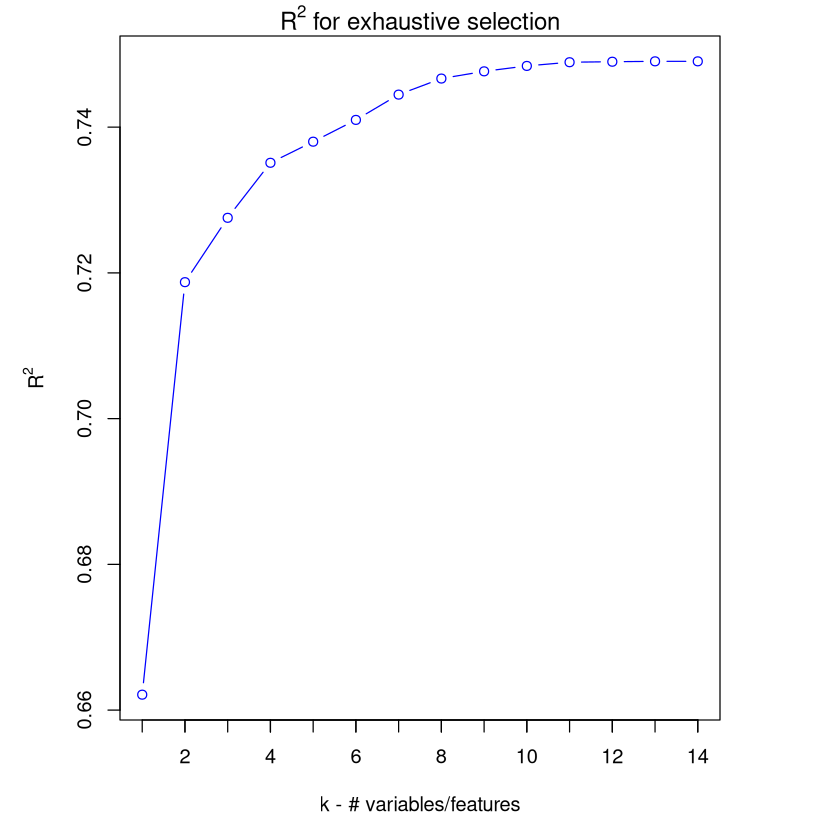

In [16]:
## this code plots R^2 (for the best model w/ k=number of variables in the model) vs. k 
par(mai=c(1,1,0.3,1))
plot(x=1:14,y=full.summary$rsq,type="b",main=TeX("$R^2$ for exhaustive selection"), 
     xlab="k - # variables/features", ylab=expression(R^2), col="blue")
axis(side=1, at=1:14, labels = FALSE)


<br>

Hopefully, your plot is okay, in which case we can see that after $k$ = 4 features, $R^2$ slows down. After $k=7$ or $k=8$, the increase of $R^2$ becomes almost insignificant. 

We don't want too many features as that may make the model too complex, and thus, we would get high variability i.e. large differences in fitted models from one sample to another (meaning that the fitted model on our particular example would not be reliable). On the other hand, we don't want too few of variables either, to avoid high bias. By looking at the above plot, one may think that choosing number of features to be $k$ = 5, 6 or 7 could be appropriate. We don't want to add more variables if that does not improve $R^2$ significantly.

**Caveat**: Keep in mind $R^2$ here is an *in-sample* estimate; Even if $R^2$ is relatively large for a fitted model, it may still make poor predictions for new, out-of-sample data.

<br>

#### Part (c)

If we want to go with $k=6$ features, based on the best subset selection (i.e. exhaustive method), what features should you include? Using the function `coef()`, create R vector `coeffis` which consists of estimated coefficients in the best model with 6 features. So, your code should look like:

`coeffis = <some expression>`

**Do NOT round your answer.**

If you do it correctly (as done in class), the components of the vector `coeffis` should also have their names. You can check that by typing 

`names(coeffis)`

Note that the first component has name `(Intercept)`, since the intercept is included. Also, the vector should be of length 7, since it includes the intercept.



In [17]:

coeffis = coef(regfit.full, id = 6)  
names(coeffis)


[1] "(Intercept)" "age"         "weight"      "abdom"       "thigh"      
[6] "forearm"     "wrist"

In [18]:
## check whether the length of coeffis is correct

if (test_that(desc="", code={
    expect_equal(length(coeffis)==7, TRUE)
}) != TRUE) stop("Sorry, wrong answer")


## check whether the names of features (including (Intercept)) are correct

coefnames = c('(Intercept)','age','weight','abdom','thigh','forearm','wrist')

if (test_that(desc="", code={
    expect_equal(all.equal(coefnames, names(coeffis)), TRUE)
}) != TRUE) stop("Sorry, wrong answer")


## check whether coefficient for "forearm" is 0.459261202744725

if (test_that(desc="", code={
    expect_equal(abs(unname(coeffis['forearm']) - 0.459261202744725) < 1.e-5, TRUE)
}) != TRUE) stop("Sorry, wrong answer")


## check whether coefficient for "wrist" is -1.62786942535323

if (test_that(desc="", code={
    expect_equal(abs(unname(coeffis['wrist']) - (-1.62786942535323)) < 1.e-5, TRUE)
}) != TRUE) stop("Sorry, wrong answer")


Test passed 🎊
Test passed 🎉
Test passed 🥇
Test passed 🌈


In [19]:
## check whether the answer is correct (hidden tests)




#### Part (d)

Create R object `mod` using `lm` function with `brozek` as the output and the features from your best 6-feature model as explanatory variables. Use 

`summary(mod)`

to check whether you get the same values (up to round-off error) of coefficients, i.e. the same model as above.



In [20]:

mod = lm(brozek ~ age + weight + abdom + thigh + forearm + wrist, data = ddf)
summary(mod)



Call:
lm(formula = brozek ~ age + weight + abdom + thigh + forearm + 
    wrist, data = ddf)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9590 -2.7985 -0.1697  2.8099  8.2275 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -34.83940    7.97616  -4.368 1.85e-05 ***
age           0.05664    0.02853   1.985 0.048205 *  
weight       -0.12805    0.03045  -4.205 3.67e-05 ***
abdom         0.84591    0.06460  13.095  < 2e-16 ***
thigh         0.20815    0.10795   1.928 0.054995 .  
forearm       0.45926    0.16885   2.720 0.006996 ** 
wrist        -1.62787    0.45814  -3.553 0.000456 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.993 on 245 degrees of freedom
Multiple R-squared:  0.741,	Adjusted R-squared:  0.7347 
F-statistic: 116.8 on 6 and 245 DF,  p-value: < 2.2e-16


In [21]:

## check whether coefficient for "forearm" of mod object is 0.459261202744725

if (test_that(desc="", code={
    expect_equal(abs(unname(coef(mod)[6]) - 0.459261202744725) < 1.e-5, TRUE)
}) != TRUE) stop("Sorry, wrong answer")


## check whether coefficient for "wrist" of mod object is -1.62786942535323

if (test_that(desc="", code={
    expect_equal(abs(unname(coef(mod)['wrist']) - (-1.62786942535323)) < 1.e-5, TRUE)
}) != TRUE) stop("Sorry, wrong answer")


Test passed 🥇
Test passed 🥇


In [22]:
## check whether the coefficients of mod object are correct (hidden tests)


#### Part (e)

Use function `predict()` and your `mod` model to make prediction of `brozek` value based on the following values of input features: <br>

age=24, weight=185.2, abdom=98, thigh=63.2, forearm=27.7, wrist=17.7

This is done in the same way when there is only one predictor/feature, except that now you need to list values of multiple features. Store the value of prediction as R variable `yhat`. So, your code should look like:

`yhat = predict(mod, newdata=data.frame(age=??, weight=??, ... , wrist=??))`

<br>

**Do NOT round your answer**



In [24]:

yhat = predict(mod, newdata = data.frame(age = 24, weight = 185.2, abdom = 98, thigh = 63.2, forearm = 27.7, wrist = 17.7))


In [25]:
## check whether yhat is correct

if (test_that(desc="", code={
    expect_equal(abs(unname(yhat) - 22.7664953953147) < 1.e-5, TRUE)
}) != TRUE) stop("Sorry, wrong answer")


Test passed 🎉


## Question 2 (OPTIONAL)

#### This question is optional. It does not add nor subtract any points, nor that it counts as an extra credit.

Repeat Question 1, but use forward selection.

Part a)

In [26]:
ddf = subset(fat, select = -c(siri, density, free))

Part b)

In [29]:
regfit.fwd = regsubsets(brozek ~ ., data = ddf, nvmax = 14, method = "forward", nbest = 1)
fwd.summary = summary(regfit.fwd)
fwd.summary$rsq

[1] 0.6621178 0.7187265 0.7275563 0.7351080 0.7380049 0.7404753 0.7444651
 [8] 0.7466688 0.7476576 0.7484005 0.7489093 0.7489771 0.7490309 0.7490309

Plot R² for forward selection

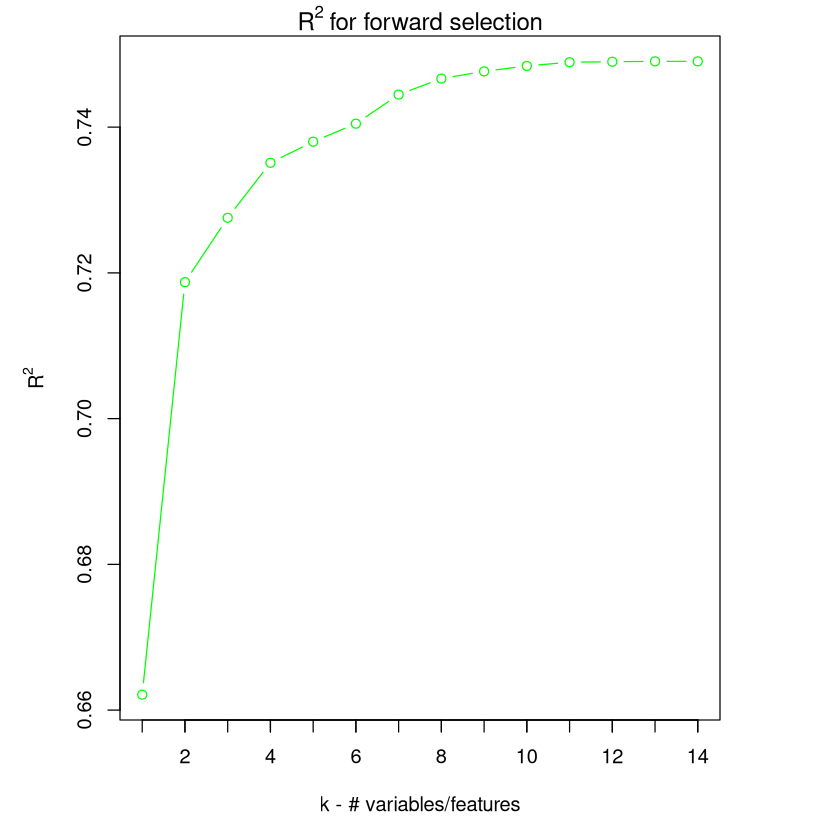

In [30]:
par(mai=c(1,1,0.3,1))
plot(x = 1:14, y = fwd.summary$rsq, type = "b",
     main = expression(R^2 ~ "for forward selection"),
     xlab = "k - # variables/features",
     ylab = expression(R^2), col = "green")
axis(side = 1, at = 1:14, labels = FALSE)

Part c)

In [31]:
coeffis.fwd = coef(regfit.fwd, id = 6)
names(coeffis.fwd)

[1] "(Intercept)" "age"         "weight"      "neck"        "abdom"      
[6] "forearm"     "wrist"

Part d)

In [32]:
mod.fwd = lm(brozek ~ age + weight + abdom + thigh + forearm + wrist, data = ddf)
summary(mod.fwd)


Call:
lm(formula = brozek ~ age + weight + abdom + thigh + forearm + 
    wrist, data = ddf)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9590 -2.7985 -0.1697  2.8099  8.2275 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -34.83940    7.97616  -4.368 1.85e-05 ***
age           0.05664    0.02853   1.985 0.048205 *  
weight       -0.12805    0.03045  -4.205 3.67e-05 ***
abdom         0.84591    0.06460  13.095  < 2e-16 ***
thigh         0.20815    0.10795   1.928 0.054995 .  
forearm       0.45926    0.16885   2.720 0.006996 ** 
wrist        -1.62787    0.45814  -3.553 0.000456 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.993 on 245 degrees of freedom
Multiple R-squared:  0.741,	Adjusted R-squared:  0.7347 
F-statistic: 116.8 on 6 and 245 DF,  p-value: < 2.2e-16


Part e)

In [33]:
yhat.fwd = predict(mod.fwd, newdata = data.frame(age = 24, weight = 185.2, abdom = 98, thigh = 63.2, forearm = 27.7, wrist = 17.7))


## Question 3 (OPTIONAL)

#### This question is optional. It does not add nor subtract any points, nor that it counts as an extra credit.

Use simple validation and repeat the procedure from class with `Hitters` data. Use the code from class, with appropriate modifications.